<a href="https://colab.research.google.com/github/HeidyRemache/DataMining/blob/main/RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clasificación de Dígitos con una Red Neuronal en Keras**

In [1]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos MNIST (imágenes de dígitos)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Redimensionar los datos para adaptarse a las capas convolucionales
# Añadimos una dimensión extra al final para indicar que son imágenes en escala de grises (canal 1)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [4]:
# Normalizar los datos (convertir los valores de los píxeles en un rango de 0 a 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

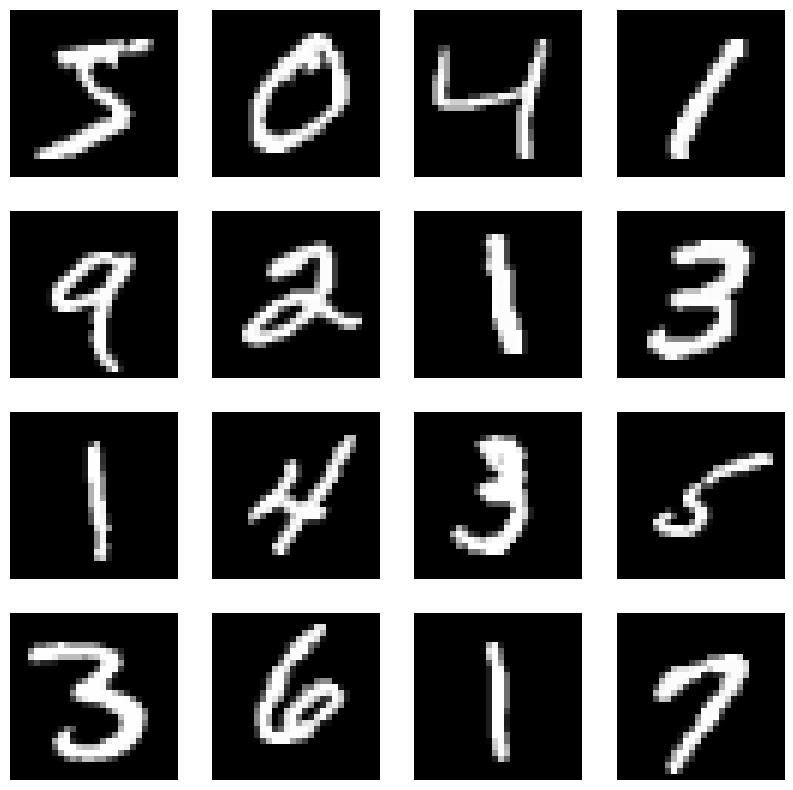

In [5]:
# Visualizar algunas imágenes del conjunto de datos
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [6]:
# Definir la arquitectura de la red neuronal convolucional (CNN)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Primera capa convolucional
    layers.MaxPooling2D((2, 2)),  # Capa de agrupación (pooling) para reducir el tamaño espacial
    layers.Conv2D(64, (3, 3), activation='relu'),  # Segunda capa convolucional
    layers.MaxPooling2D((2, 2)),  # Segunda capa de agrupación
    layers.Conv2D(64, (3, 3), activation='relu'),  # Tercera capa convolucional
    layers.Flatten(),  # Aplanar el resultado antes de las capas densas
    layers.Dense(64, activation='relu'),  # Capa densa con 64 neuronas
    layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas para las 10 clases
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.9009 - loss: 0.3188 - val_accuracy: 0.9814 - val_loss: 0.0580
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9857 - loss: 0.0467 - val_accuracy: 0.9878 - val_loss: 0.0378
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9900 - loss: 0.0326 - val_accuracy: 0.9879 - val_loss: 0.0362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.9916 - val_loss: 0.0297
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9935 - loss: 0.0206 - val_accuracy: 0.9891 - val_loss: 0.0395


In [9]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9854 - loss: 0.0526

Precisión en el conjunto de prueba: 0.9891


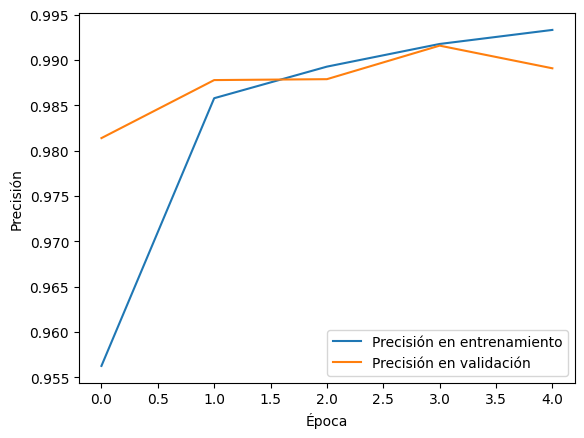

In [10]:
# Visualización de la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()